In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 400)

In [2]:
carpr = pd.read_csv('/Users/ksjo/Documents/MC/TV_GRPs_by_models_v2.csv')
carpr = carpr.iloc[:-2]

In [24]:
carpr

,년,월,Advertiser,Product,연령대,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,1+ 도달빈도,광고 회당 시청률
0,2016.0,01월,BMW코리아,BMW미니클럽맨,20대,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000
1,2016.0,01월,BMW코리아,BMW미니클럽맨,30대,1.0,21000.0,0.5,21000.0,0.5,0.0,0.0,0.0,0.0,1.000000,0.500000
2,2016.0,01월,BMW코리아,BMW미니클럽맨,40대,1.0,23840.0,0.6,23840.0,0.6,0.0,0.0,0.0,0.0,1.000000,0.600000
3,2016.0,01월,BMW코리아,BMW미니클럽맨,50대,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000
4,2016.0,01월,BMW코리아,BMW미니클럽맨,60대,1.0,5638.0,0.2,5638.0,0.2,0.0,0.0,0.0,0.0,1.000000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,2020.0,10월,혼다코리아,혼다CR-V,30대,27.0,9939.0,0.3,9939.0,0.3,0.0,0.0,0.0,0.0,1.000000,0.011111
6290,2020.0,10월,혼다코리아,혼다CR-V,40대,27.0,32944.0,0.8,27119.0,0.7,0.0,0.0,0.0,0.0,1.142857,0.029630
6291,2020.0,10월,혼다코리아,혼다CR-V,50대,27.0,35197.0,0.9,25964.0,0.6,0.0,0.0,0.0,0.0,1.500000,0.033333
6292,2020.0,10월,혼다코리아,혼다CR-V,60대,27.0,36975.0,0.8,19556.0,0.4,0.1,0.1,0.0,0.0,2.000000,0.029630


In [4]:
# 에프씨에이코리아 = fca코리아
carpr.loc[carpr["Advertiser"] == '에프씨에이코리아', 'Advertiser'] = "FCA코리아"
carpr['Advertiser'].unique()

array(['BMW코리아', 'FMK', '메르세데스벤츠코리아', '아우디코리아', '재규어랜드로버코리아',
       '포드세일즈서비스코리아', '한국닛산', '한국토요타자동차', '한불모터스', '볼보자동차코리아', '캐딜락코리아',
       '혼다코리아', '아우디폭스바겐코리아', '지엠코리아', '지엠아시아퍼시픽지역본부', '포르쉐코리아', 'FCA코리아',
       '기흥인터내셔널', '더클래스효성', '비워크', '도이치모터스'], dtype=object)

In [33]:
# https://m.blog.naver.com/PostView.nhn?blogId=lmw2625&logNo=110142824837&proxyReferer=https:%2F%2Fwww.google.co.kr%2F
# GRP = reach * 도달빈도(frequency)
# 광고횟수 * 회당 평균 시청률 = GRP
carpr['광고 회당 시청률'] = carpr['GRP'] / carpr['광고횟수']


---

In [34]:
# 브랜드별 주요지표 평균 

carpr_individ = carpr[carpr['연령대']=='개인']
carpr_primary = carpr_individ[['Advertiser','광고횟수','GRP','도달율 1+','도달율 3+','도달율 5+','광고 회당 시청률']]
carpr_primary.groupby(['Advertiser']).mean().sort_values(['GRP'],ascending=False)

,광고횟수,GRP,도달율 1+,도달율 3+,도달율 5+,광고 회당 시청률
Advertiser,,,,,,
FCA코리아,442.760870,130.726087,32.145652,15.995652,9.134783,0.403566
포드세일즈서비스코리아,759.272727,129.010909,28.389091,13.783636,8.336364,0.446329
아우디폭스바겐코리아,445.906977,127.267442,29.781395,15.039535,8.786047,0.722883
한국닛산,801.142857,117.817857,21.535714,10.767857,6.753571,0.237639
볼보자동차코리아,549.485437,106.109709,20.825243,10.428155,6.559223,0.845901
아우디코리아,370.403226,103.190323,29.020968,12.608065,6.898387,0.388787
BMW코리아,592.382716,99.329630,27.366667,11.692593,6.380247,0.506391
재규어랜드로버코리아,353.743243,96.322973,20.177027,10.378378,6.318919,1.053107
한국토요타자동차,770.945455,91.360606,26.787273,10.816364,5.640000,0.162861


In [35]:
# 연령대별 주요지표 평균
carpr_a = carpr[carpr['연령대'] != '개인']
carpr_age = carpr_a[['연령대','광고횟수','GRP','도달율 1+','도달율 3+','도달율 5+']]
carpr_age.groupby(['연령대']).mean().sort_values(['GRP'],ascending=False)

,광고횟수,GRP,도달율 1+,도달율 3+,도달율 5+
연령대,,,,,
50대,527.873213,130.598761,31.034414,14.680172,8.490848
40대,527.873213,118.858723,29.542612,13.739085,7.807245
60대,527.873213,114.254242,27.242421,12.548332,7.262345
30대,527.873213,65.406959,20.218875,7.638227,3.935939
20대,527.873213,35.385987,13.324976,4.033651,1.808580


In [36]:
# 동일한 광고횟수라도 2030세대가 grp도 도달률도 가장 낮다는 것을 알 수 있다. 따라서 이삼십대 청년층을 타겟으로 하는 차량모델이라면 tv광고를 통해
# 도달률을 높이는 데 상대적으로 더 많은 비용을 필요로 할 것. 이들에게는 tv광고보다는 다른 pr수단을 통해 도달률을 높이는 것이 더 효율적일 수 있다.
# 은퇴후 집에 거주하는 시간이 많고 tv시청률이 높은 50대를 타겟으로 하는 모델의 경우 tv광고를 통해 효율적으로 grp를 높일 수 있을 것.
# 차에 대한 수요가 가장 큰 40대 역시 tv광고를 통해 

In [37]:
# 연령대별 특정브랜드 선호에 따라, 각 광고주(브랜드)별 광고의 회당 시청률도 다르지 않을까.
twenty= carpr[carpr['연령대']=='20대']
thirty= carpr[carpr['연령대']=='30대']
fourty= carpr[carpr['연령대']=='40대']
fifty= carpr[carpr['연령대']=='50대']
sixty= carpr[carpr['연령대']=='60대']

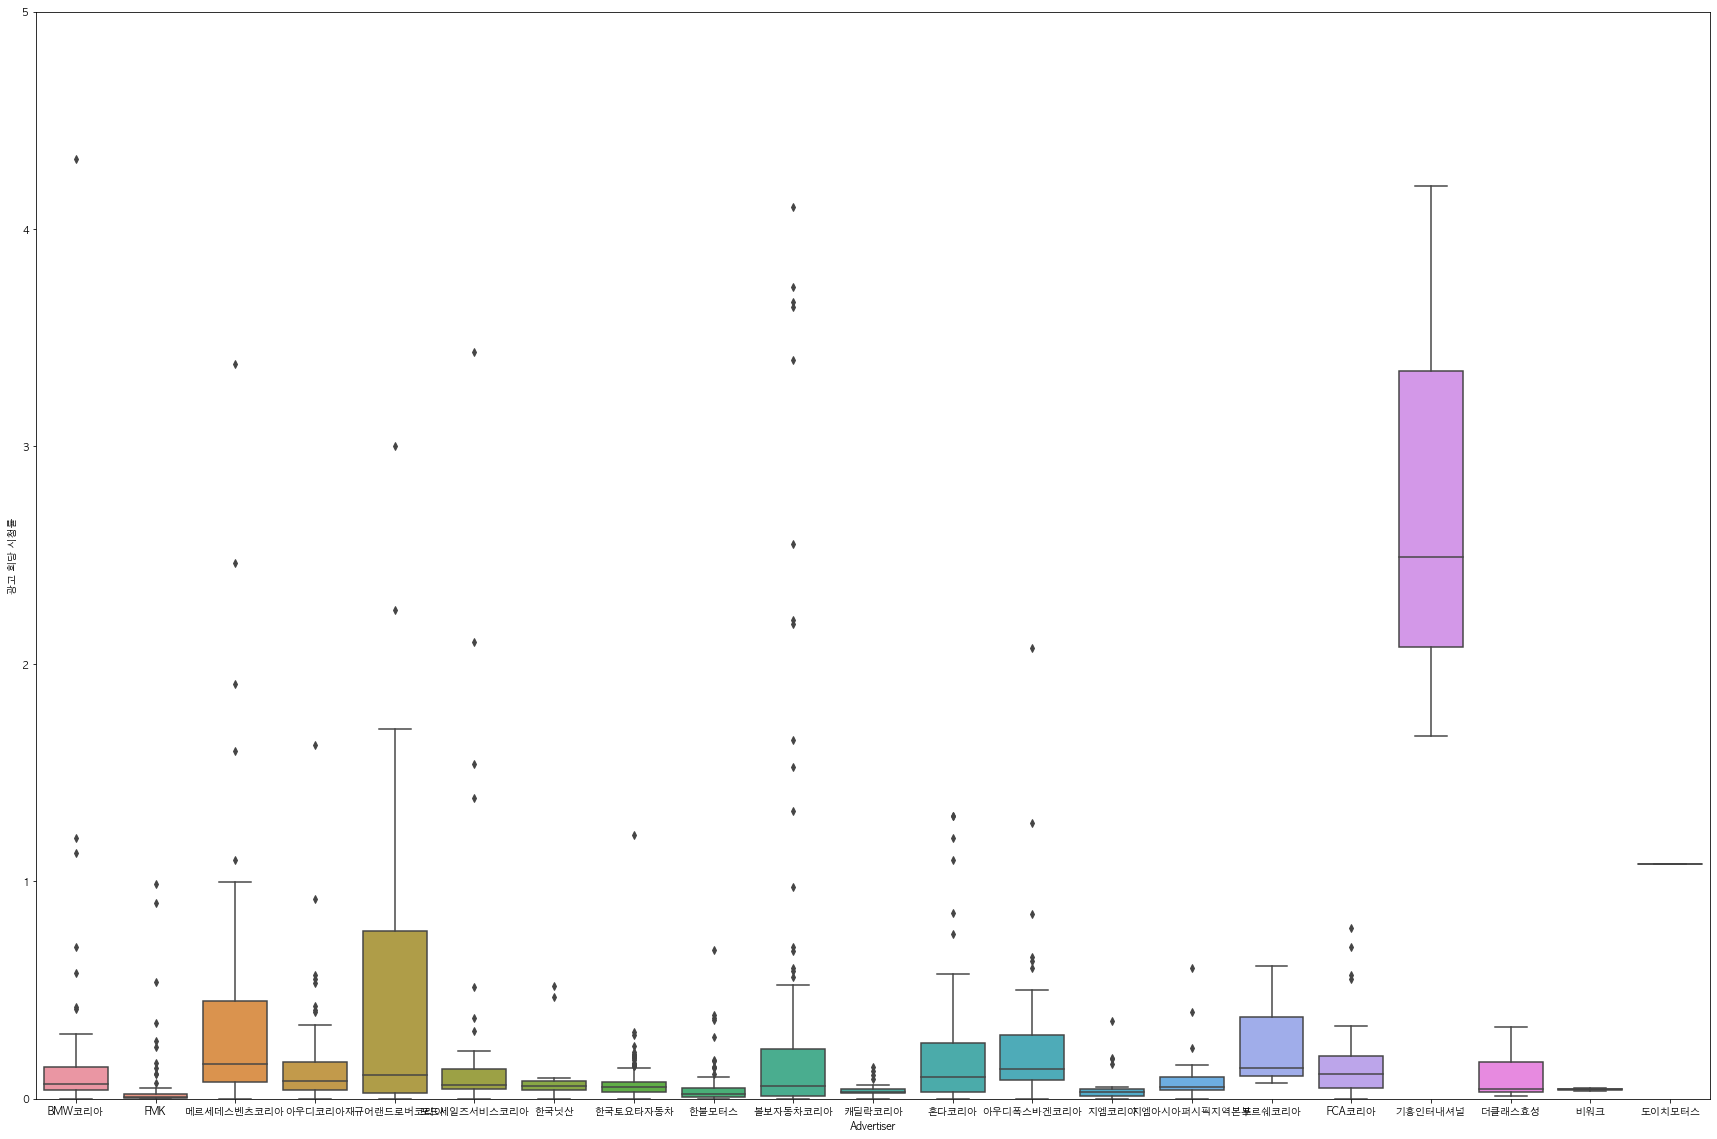

In [19]:
# 20대
plt.figure(figsize=(30,20))
sns.boxplot(x='Advertiser',y='광고 회당 시청률', data=twenty)
plt.ylim(0,5)
plt.show()

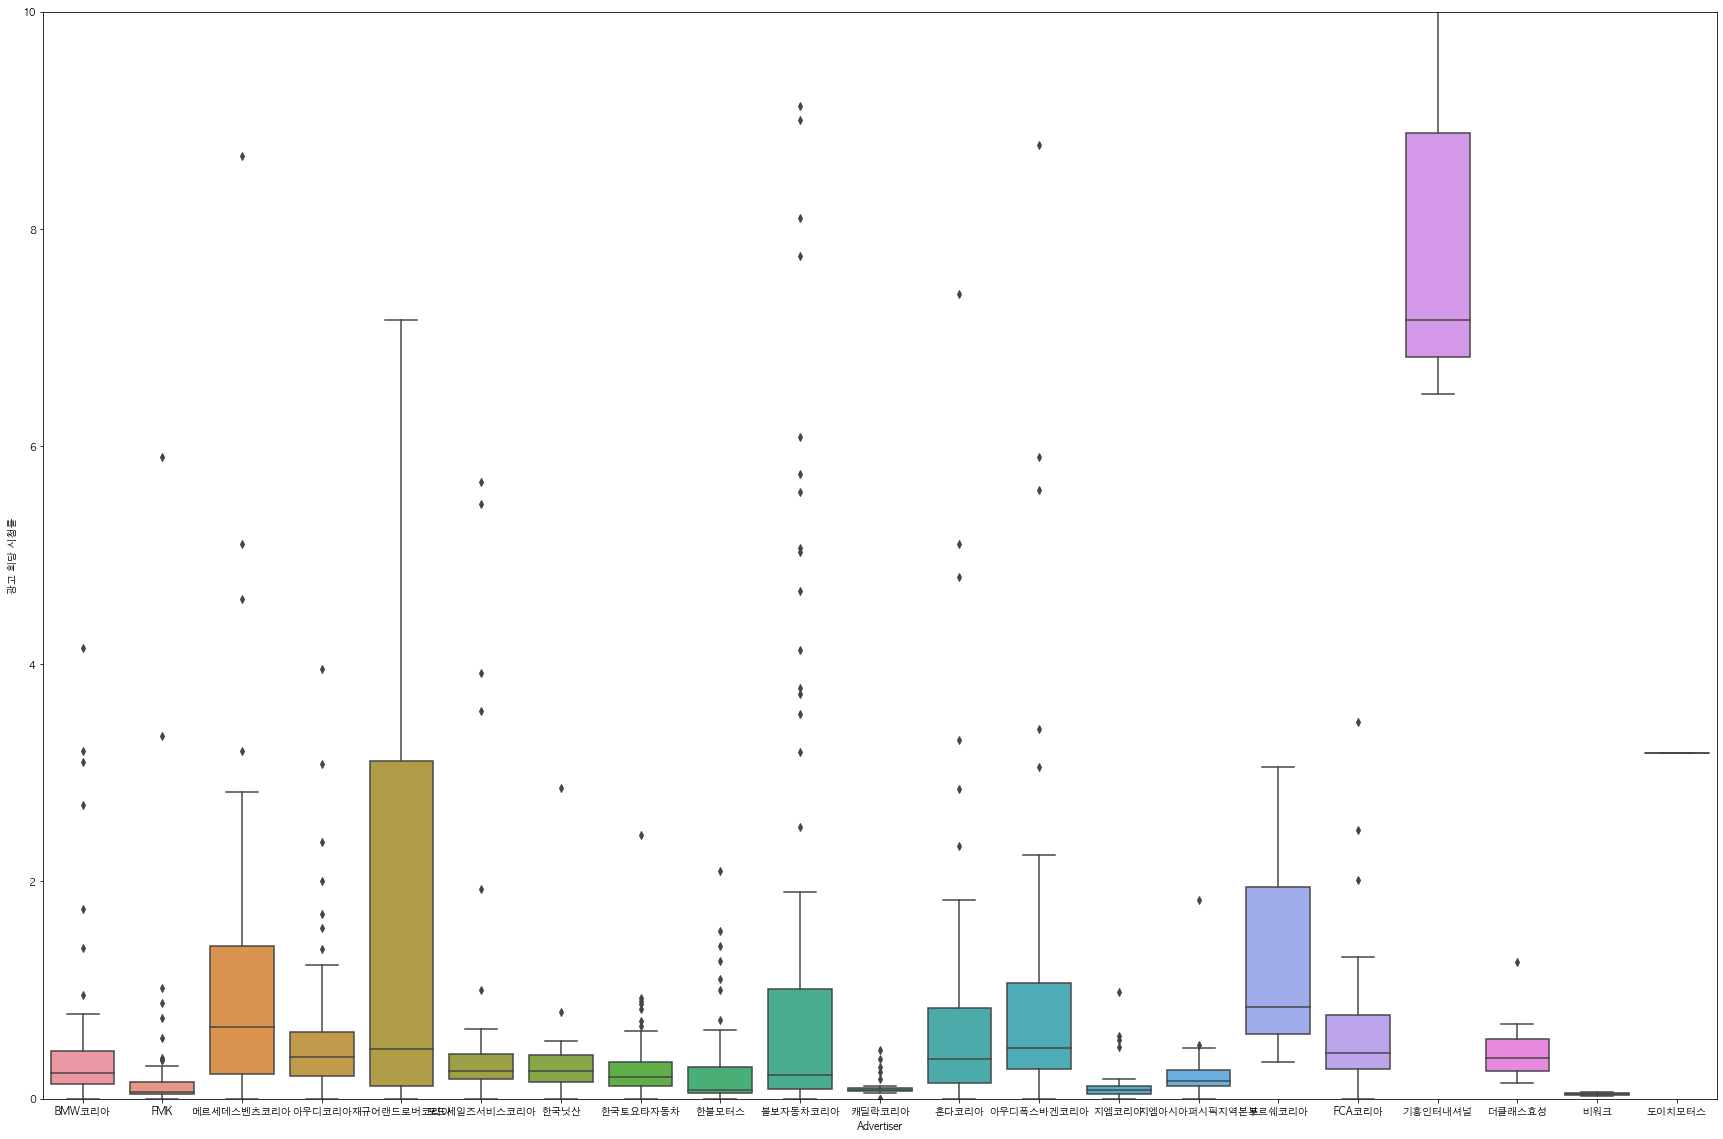

In [20]:
# 50대
plt.figure(figsize=(30,20))
sns.boxplot(x='Advertiser',y='광고 회당 시청률', data=fifty)
plt.ylim(0,10)
plt.show()

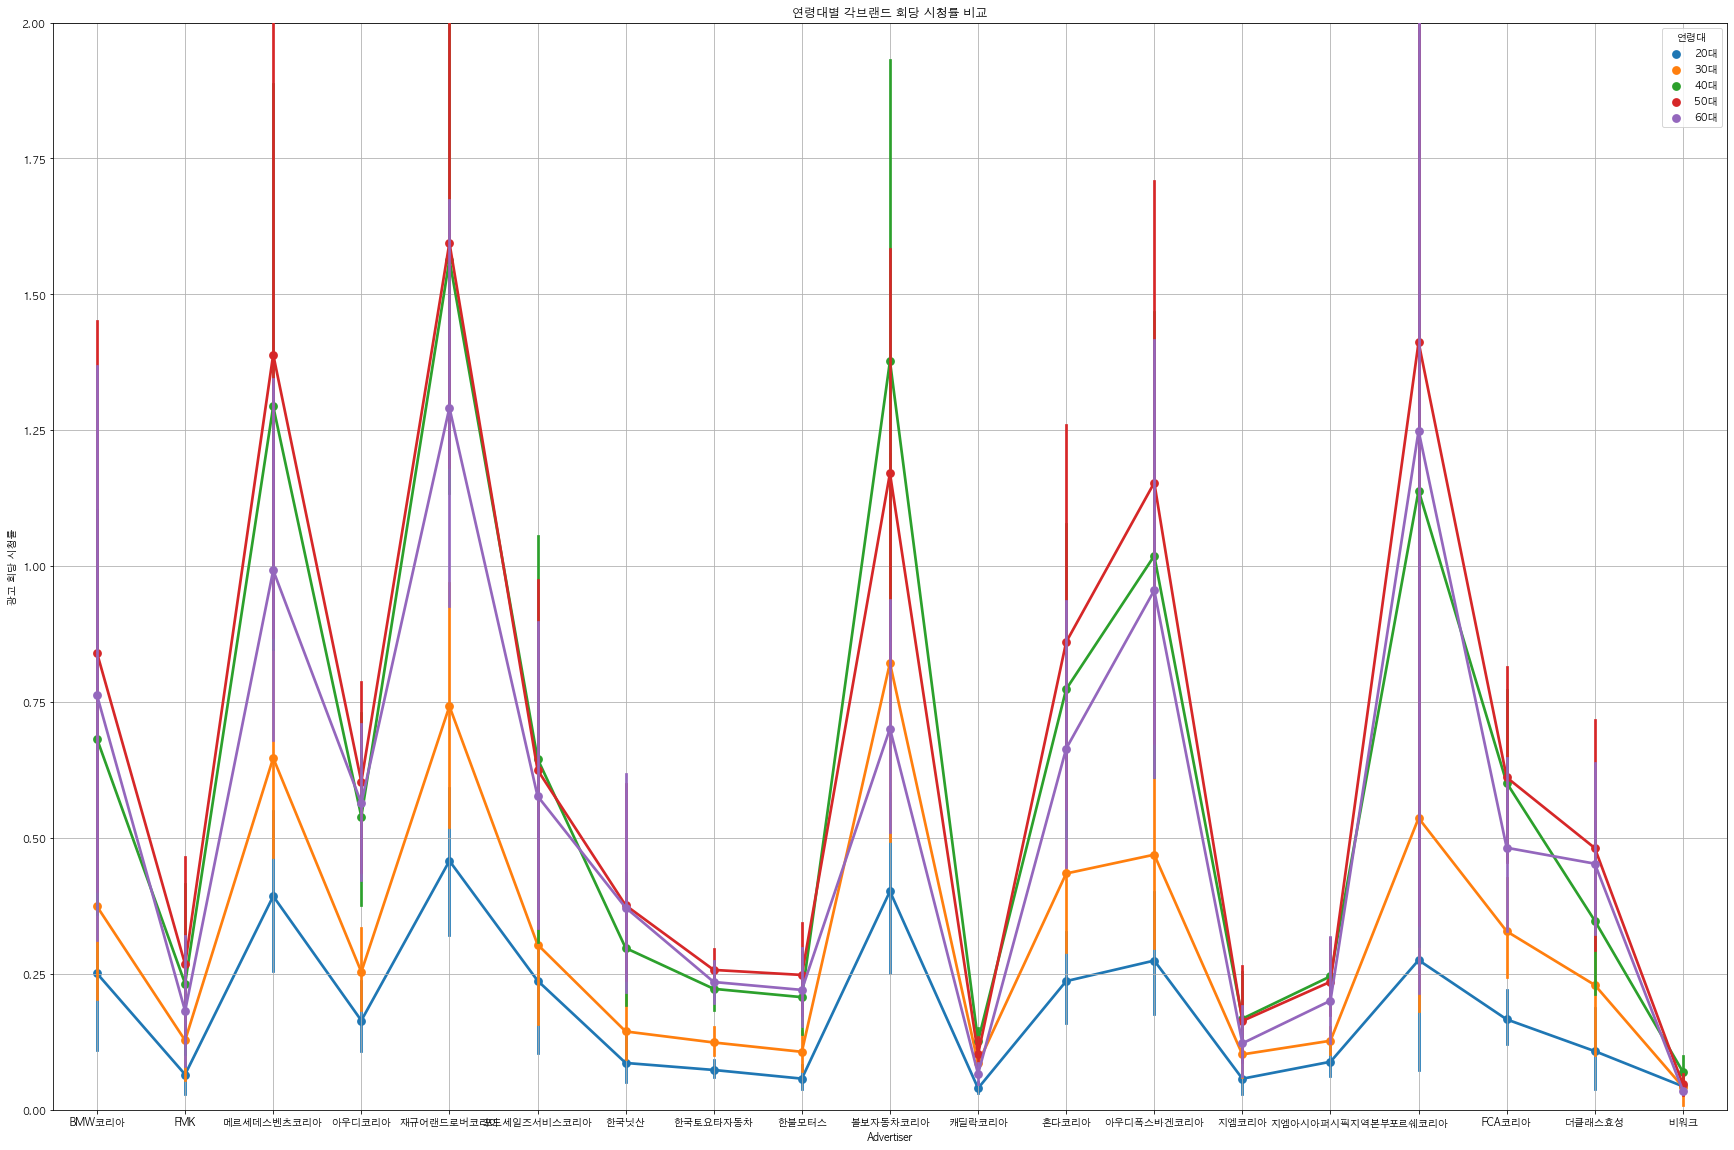

In [32]:
#기흥인터내셔널과 도이치모터스는 광고횟수 자체가 매우 작으므로, 데이터의 정확도가 떨어짐
carpr_brandfav = carpr_a[(carpr_a['Advertiser']!='기흥인터내셔널')&(carpr_a['Advertiser']!='도이치모터스')]

# 연령별/광고주별 회당 시청률
plt.figure(figsize=(30,20))
sns.pointplot(x='Advertiser',y='광고 회당 시청률',hue='연령대', data=carpr_brandfav)
plt.title("연령대별 각브랜드 회당 시청률 비교")
plt.ylim(0,2)
plt.grid()
plt.show()

In [ ]:
# 전반적으로 벤츠(메르세데스벤츠코리아+더클래스효성),재규어랜드로버,볼보,아우디폭스바겐(+아우디코리아),포르쉐코리아가 회당 시청률이 높았다.
# 전반적으로 40대가 5,60대보다 일본차에 대한 시청률이 낮은 것으로 보임.
# 40대는 유독 볼보자동차 광고에 시청률이 높음.

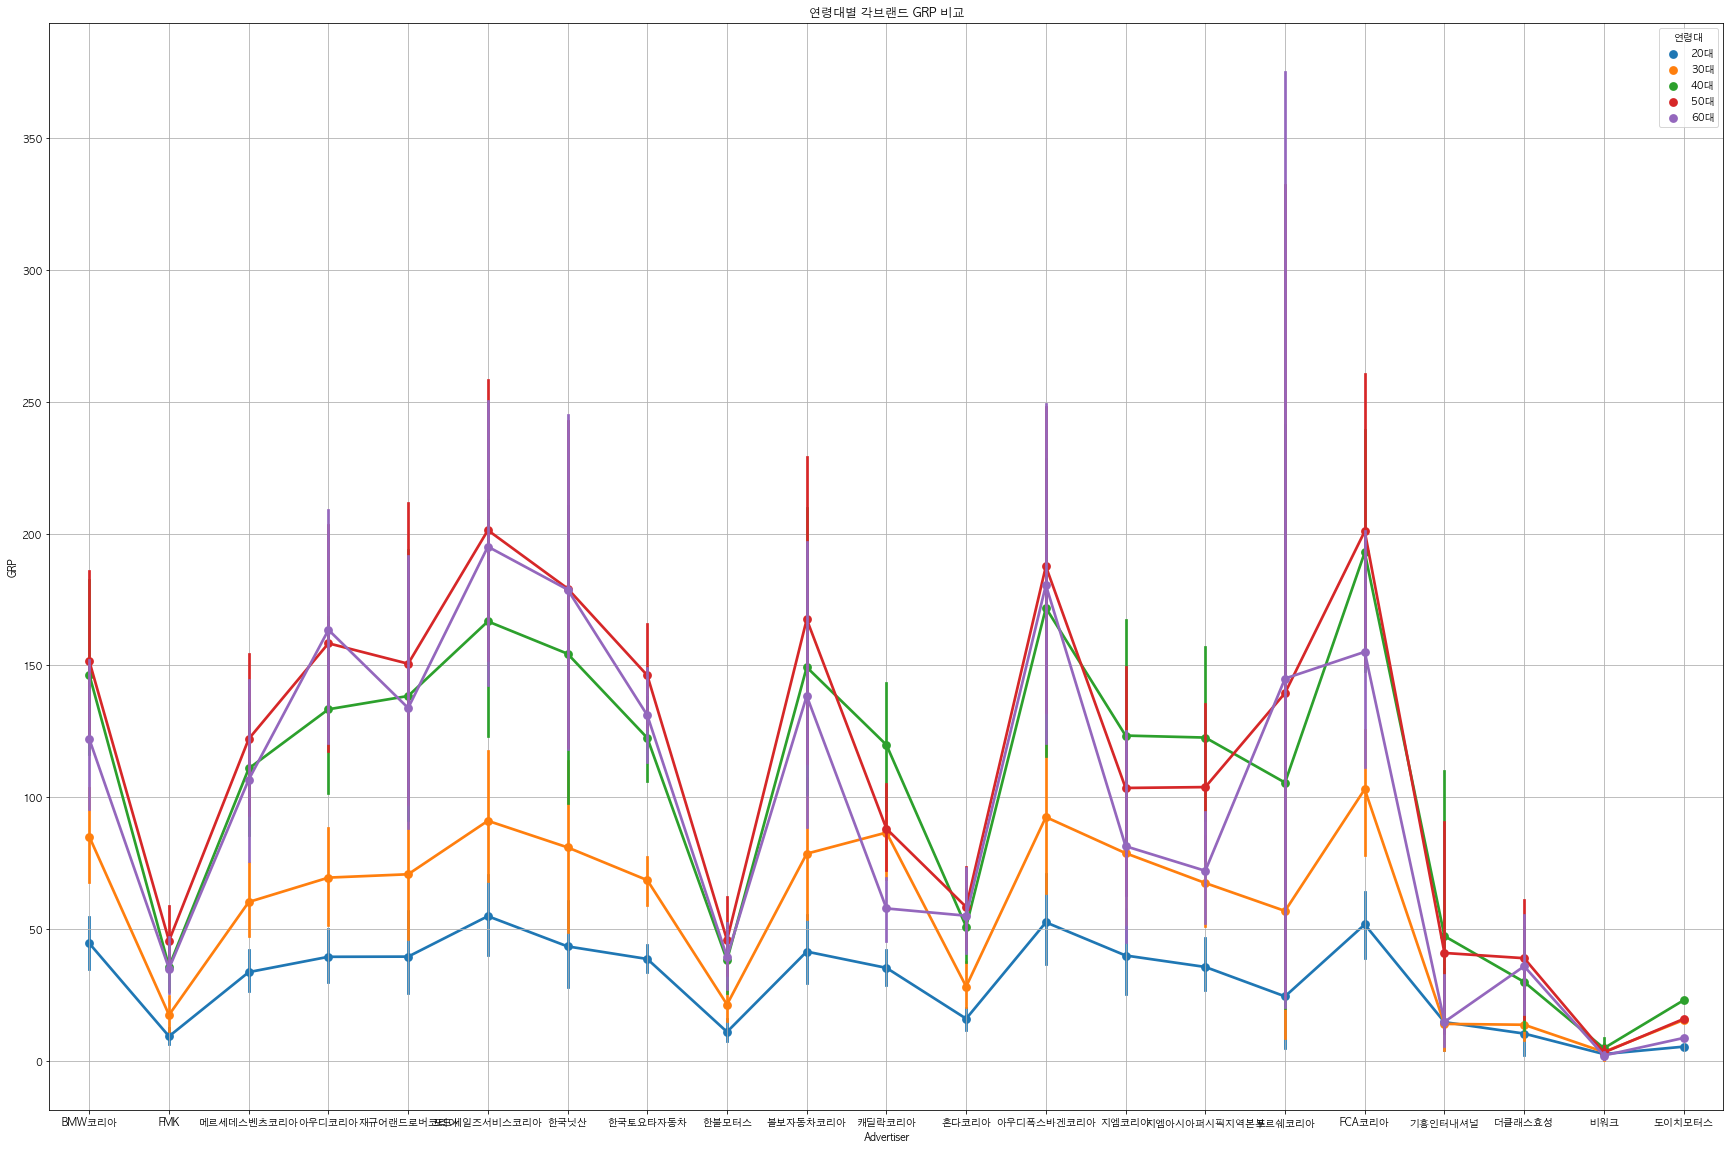

In [22]:
# 연령대별 각 브랜드(광고주)의 GRP
plt.figure(figsize=(30,20))
sns.pointplot(x='Advertiser',y='GRP',hue='연령대', data=carpr_a)
plt.title("연령대별 각브랜드 GRP 비교")
plt.grid()
plt.show()